<a href="https://colab.research.google.com/github/MKhromina/-furry-train/blob/master/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D1%81_cifar10_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Импорт библиотек*

In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow import keras

Для выполнения задачи выбрала набор CIFAR-10

In [2]:
# Размер мини-выборки
batch_size =128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 100
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

**Загрузка данных**

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

**Нормализация данных**

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Преобразуем отклик в формат one hot encoding**

In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Создаем сверточную нейронную сеть

Выбрала сверточные нейронне сети, так как считаю, что это одна из аиболее подхрдящих архитектур для обработки изображений, т.к сверточные нейронные сети обладают локальным восприятием, разделяемыми весами, а также сверточные нейронные сети спосрбны распозновать объект на изображении вне зависимости от его масштаба 

In [6]:
# Создаем последовательную модель
model = Sequential([
                     keras.layers.Conv2D(32, 2, 2,activation ="relu", padding ="same", input_shape=(32, 32, 3), ), # Первый сверточный слой
                     keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"), # Второй сверточный слой
                     keras.layers.MaxPooling2D(pool_size=(2, 2)), # Первый слой подвыборки
                     keras.layers.Dropout(0.25), # Слой регуляризации Dropout
                     keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu'), # Третий сверточный слой
                     keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu'), # Четвертый сверточный слой
                     keras.layers.MaxPooling2D(pool_size=(2, 2)), # Второй слой подвыборки
                     keras.layers.Dropout(0.3), # Слой регуляризации Dropout
                     keras.layers.Flatten(), # Слой преобразования данных из 2D представления в плоское
                     keras.layers.Dense(512, activation='relu'), # Полносвязный слой для классификации
                     keras.layers.Dropout(0.5), # Слой регуляризации Dropout
                     keras.layers.Dense(10,  activation="softmax") # Выходной слой 
                     ])

**Компилируем модель**

In [14]:
model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

## Обучаем нейронную сеть

In [15]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/100
352/352 - 3s - loss: 0.6180 - accuracy: 0.7773 - val_loss: 0.6473 - val_accuracy: 0.7806
Epoch 2/100
352/352 - 3s - loss: 0.6085 - accuracy: 0.7843 - val_loss: 0.6396 - val_accuracy: 0.7834
Epoch 3/100
352/352 - 3s - loss: 0.6188 - accuracy: 0.7796 - val_loss: 0.6506 - val_accuracy: 0.7778
Epoch 4/100
352/352 - 3s - loss: 0.6166 - accuracy: 0.7802 - val_loss: 0.6604 - val_accuracy: 0.7764
Epoch 5/100
352/352 - 3s - loss: 0.6136 - accuracy: 0.7807 - val_loss: 0.6622 - val_accuracy: 0.7784
Epoch 6/100
352/352 - 3s - loss: 0.6198 - accuracy: 0.7776 - val_loss: 0.6617 - val_accuracy: 0.7788
Epoch 7/100
352/352 - 3s - loss: 0.6185 - accuracy: 0.7797 - val_loss: 0.6490 - val_accuracy: 0.7830
Epoch 8/100
352/352 - 3s - loss: 0.6052 - accuracy: 0.7825 - val_loss: 0.6525 - val_accuracy: 0.7796
Epoch 9/100
352/352 - 3s - loss: 0.6090 - accuracy: 0.7806 - val_loss: 0.6456 - val_accuracy: 0.7818
Epoch 10/100
352/352 - 3s - loss: 0.6053 - accuracy: 0.7846 - val_loss: 0.6493 - val_accura

**Печатаем информацию о сети**

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4128      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0

**Оцениваем качетсво обучения сети**

In [17]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 77.45%


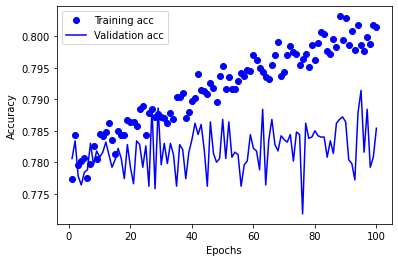

In [18]:
history_dict = history.history
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Полносвязная модель

Полносвязная нейронная сеть редко используется для обработки изображений. Существенными её недостатком является то, что на вход изображения подаются в виде плоского массива из-за чего теряется топологическая информация

In [19]:

model2 = Sequential([
                     keras.layers.Flatten(input_shape=(32,32,3)),
                     keras.layers.Dense(600,  activation="relu"),
                     keras.layers.Dense(10,  activation="softmax")
])


In [20]:
model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [21]:
history2 =model2.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/100
352/352 - 2s - loss: 1.9797 - accuracy: 0.3180 - val_loss: 1.8347 - val_accuracy: 0.3276
Epoch 2/100
352/352 - 2s - loss: 1.7218 - accuracy: 0.3871 - val_loss: 1.6863 - val_accuracy: 0.4012
Epoch 3/100
352/352 - 2s - loss: 1.6506 - accuracy: 0.4134 - val_loss: 1.6664 - val_accuracy: 0.4018
Epoch 4/100
352/352 - 2s - loss: 1.6022 - accuracy: 0.4345 - val_loss: 1.6004 - val_accuracy: 0.4430
Epoch 5/100
352/352 - 2s - loss: 1.5571 - accuracy: 0.4475 - val_loss: 1.5754 - val_accuracy: 0.4444
Epoch 6/100
352/352 - 2s - loss: 1.5380 - accuracy: 0.4562 - val_loss: 1.5323 - val_accuracy: 0.4576
Epoch 7/100
352/352 - 2s - loss: 1.5053 - accuracy: 0.4686 - val_loss: 1.5659 - val_accuracy: 0.4502
Epoch 8/100
352/352 - 2s - loss: 1.4788 - accuracy: 0.4772 - val_loss: 1.5795 - val_accuracy: 0.4454
Epoch 9/100
352/352 - 2s - loss: 1.4650 - accuracy: 0.4803 - val_loss: 1.5297 - val_accuracy: 0.4592
Epoch 10/100
352/352 - 2s - loss: 1.4460 - accuracy: 0.4873 - val_loss: 1.4960 - val_accura

In [22]:
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



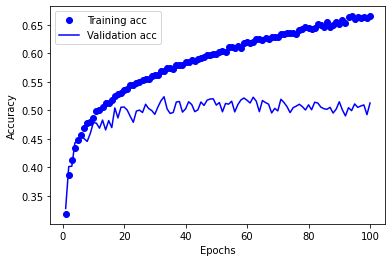

In [23]:
history_dict2 = history2.history
acc_values = history_dict2["accuracy"]
val_acc_values = history_dict2["val_accuracy"]
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

по графикам видно, что полносвязная нейронная сеть довольно плохо справляется с задачей классификации изображений, в то время как сверточная нейронная сеть довольно хорошо справляется с этой задачей 